# Graph Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [3]:
def show_graph(adjacency_matrix, labels=None, node_size=500):
    color_map = {1: 'blue', 2: 'green', 3: 'red', 4: 'yellow'}
    colors = [color_map[x] for x in labels] if labels is not None else None
        
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=node_size, node_color=np.array(colors)[list(gr.nodes)] if labels is not None else None)
    plt.show()


## Sample Graph

<center>

![Graph](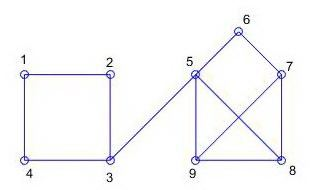
)

</center>

In [4]:
graph = np.array([[0, 1, 0, 1, 0, 0, 0, 0, 0],
                [1, 0, 1, 0, 0, 0, 0, 0, 0],
                [0, 1, 0, 1, 1, 0, 0, 0, 0],
                [1, 0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 1, 1],
                [0, 0, 0, 0, 1, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 1, 0, 1, 1],
                [0, 0, 0, 0, 1, 0, 1, 0, 1],
                [0, 0, 0, 0, 1, 0, 1, 1, 0]])

In [5]:
sum_rows = graph.sum(axis=1).flatten()
lapl = np.diag(sum_rows) - graph

In [6]:
eigen_values, eigen_vectors = np.linalg.eig(lapl)
sorted_values = np.argsort(eigen_values)
eigen_values = eigen_values[sorted_values]
eigen_vectors = eigen_vectors[:,sorted_values]

## 2 Cluster

In [7]:
labels = []
size = eigen_vectors.shape[1]
for i in range(size):
    if eigen_vectors[i][1] < 0:
        labels.append(1)
    else:
        labels.append(2)

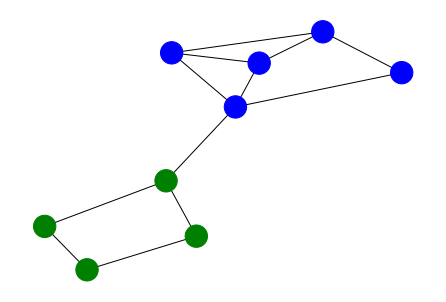

In [8]:
show_graph(graph, labels)

## 4 Cluster

In [9]:
labels = []
size = eigen_vectors.shape[1]
for i in range(size):
    element1, element2 = eigen_vectors[i][1], eigen_vectors[i][2]
    if element1 > 0 and element2 > 0:
        labels.append(1)
    elif element1 < 0 and element2 > 0:
        labels.append(2)
    elif element1 > 0 and element2 < 0:
        labels.append(3)
    elif element1 < 0 and element2 < 0:
        labels.append(4)

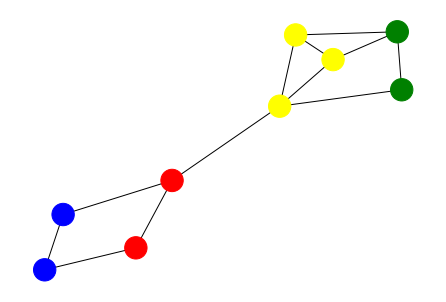

In [10]:
show_graph(graph, labels)

## Cluster Final Graph

In [11]:
adj_final = np.zeros((100, 100))
file1 = open('./data/data.txt', 'r')
lines = file1.readlines()
for l in lines:
    i, j = l.split()
    adj_final[int(i) - 1, int(j) - 1] = 1
    adj_final[int(j) - 1, int(i) - 1] = 1
    

In [12]:
sum_rows = adj_final.sum(axis=1).flatten()
lapl = np.diag(sum_rows) - adj_final

eigen_values, eigen_vectors = np.linalg.eig(lapl)
sorted_values = np.argsort(eigen_values)
eigen_values = eigen_values[sorted_values]
eigen_vectors = eigen_vectors[:,sorted_values]

labels_2 = []
for i in range(eigen_vectors.shape[1]):
    element = eigen_vectors[i][1]
    if element < 0:
        labels_2.append(1)
    else:
        labels_2.append(2)

labels_4 = []
for i in range(eigen_vectors.shape[1]):
    element1, element2 = eigen_vectors[i][1], eigen_vectors[i][2]
    if element1 > 0 and element2 > 0:
        labels_4.append(1)
    elif element1 < 0 and element2 > 0:
        labels_4.append(2)
    elif element1 > 0 and element2 < 0:
        labels_4.append(3)
    elif element1 < 0 and element2 < 0:
        labels_4.append(4)

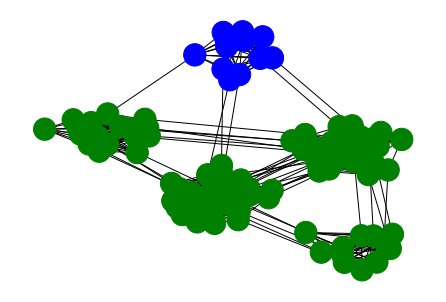

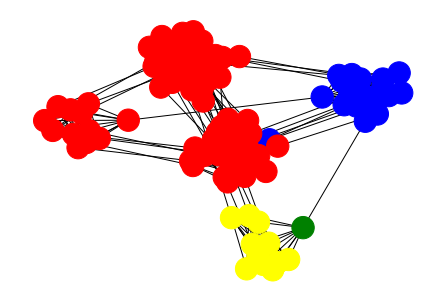

In [13]:
show_graph(adj_final, labels_2)
show_graph(adj_final, labels_4)